In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
train_dataset = pd.read_csv('PM_train.txt',sep=' ')

In [ ]:
train_dataset.drop(train_dataset.columns[[26,27]], axis=1,inplace=True)

In [ ]:
col_name = ['id','cycle','set1','set2','set3','s1','s2','s3','s4','s5','s6','s7','s8']+['s9','s10','s11','s12','s13','s14','s14','s15','s16','s17','s18','s19','s20']
train_dataset.columns = col_name

In [ ]:
#print(train_dataset.head(2))
print(train_dataset.shape)

(20630, 26)


In [ ]:
test_dataset = pd.read_csv('PM_test.txt',sep=' ')
test_dataset.drop(test_dataset.columns[[26,27]], axis=1,inplace=True)
test_dataset.columns = col_name
#print(train_dataset.head(2))
print(test_dataset.shape)
test_dataset.dropna()

(13095, 26)


,id,cycle,set1,set2,set3,s1,s2,s3,s4,s5,...,s12,s13,s14,s14,s15,s16,s17,s18,s19,s20
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
truth_ds = pd.read_csv('PM_truth.txt',sep=' ')
truth_ds.drop(truth_ds.columns[[1]], axis=1,inplace=True)
truth_ds.columns = ['more']
truth_ds['id'] = truth_ds.index+1
print(truth_ds.head())

   more  id
0    98   1
1    69   2
2    82   3
3    91   4
4    93   5


In [ ]:
import pickle
filehandler = open("truth.txt","wb")
pickle.dump(truth_ds,filehandler)
filehandler.close()

In [ ]:
rul=pd.DataFrame(test_dataset.groupby("id")['cycle'].max()).reset_index()
rul.columns = ['id','max']
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
truth_ds['rtf']=truth_ds['more']+rul["max"]
truth_ds.head ()

,more,id,rtf
0,98,1,129.0
1,69,2,118.0
2,82,3,208.0
3,91,4,197.0
4,93,5,191.0


In [ ]:
#truth_ds.drop("more", axis=1, inplace=True)
test_dataset=test_dataset.merge(truth_ds, on= ['id'], how= "left")
test_dataset[ 'ttf']=test_dataset['rtf'] - test_dataset['cycle']
test_dataset.drop ('rtf', axis=1, inplace=True)
test_dataset. head()

,id,cycle,set1,set2,set3,s1,s2,s3,s4,s5,...,s14,s14,s15,s16,s17,s18,s19,s20,more,ttf
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,98.0,127.0
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,98.0,126.0
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,98.0,125.0
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,98.0,124.0
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,98.0,123.0


In [ ]:
train_dataset[ 'ttf'] = train_dataset.groupby(["id"])['cycle'].transform(max)-train_dataset['cycle']
train_dataset.head()

,id,cycle,set1,set2,set3,s1,s2,s3,s4,s5,...,s13,s14,s14,s15,s16,s17,s18,s19,s20,ttf
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,186


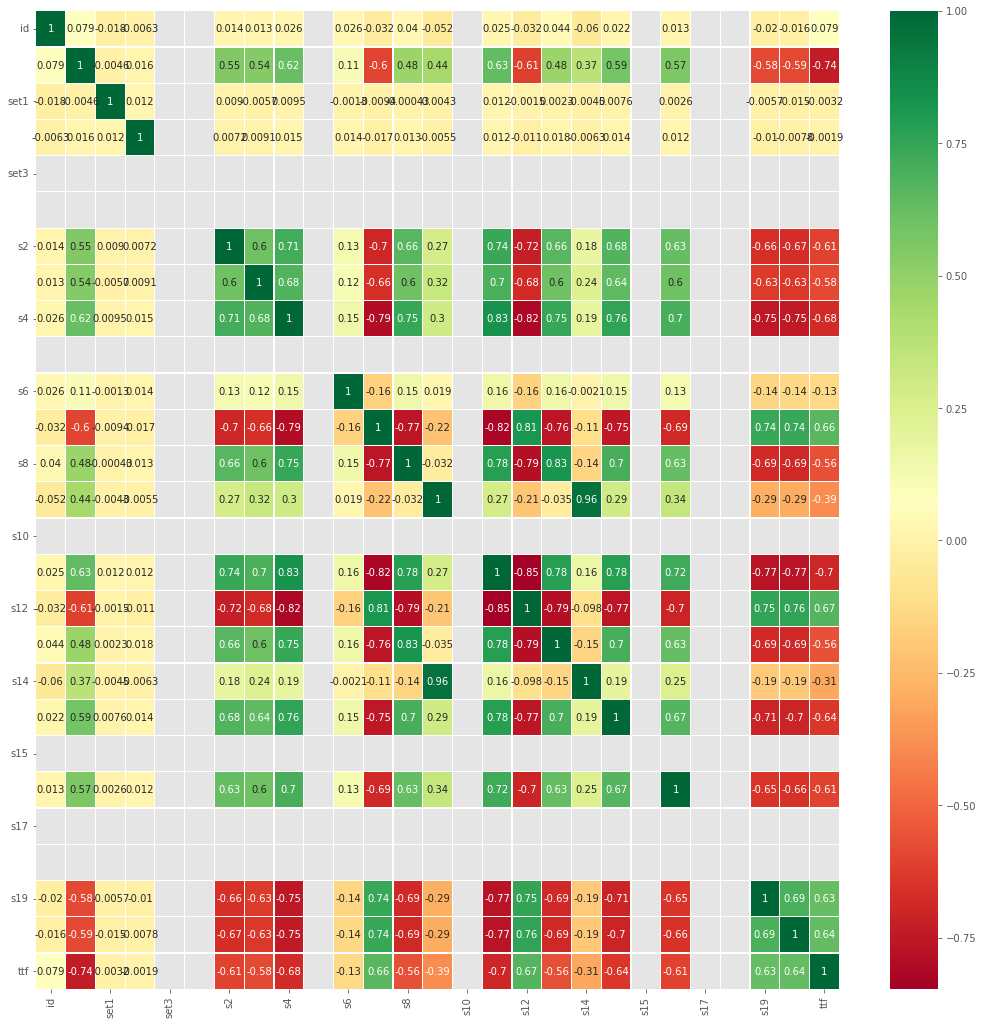

In [ ]:
import seaborn as sb
sb.heatmap(train_dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,18)
plt.show()